# 1. Linear regression with multiple variables Please download housing.xlsx file. This is a real-life dataset consisting of housing sales prices in the city of Windsor, Ontario, Canada. You can find a description of the variables on housing.txt file. Our target variable is ‘price’

## 1-1. Let’s fit the data using Linear regression with multiple variables. Please count all variables from the data. Please find the optimum Weights through gradient decent method without matrix calculation. You need to calculate cost function and update weight every iteration. You might need to normalize variables, which is called feature normalization. Please print out the final weight values and the Root Mean Squared Error (RMSE) after optimization. Please fit the data using the Linear regression model with the final Weight (Please plot ‘price’ vs ‘lotsize’).Note: Please do not use any open-source algorithm for gradient decent method. Instead, you need to write gradient descent method from scratch without matrix calculation.


In [ ]:
# Mounting the drive to import the data which is available in Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing the necessary functions which is permitted
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#importing dataset
df = pd.read_excel('/content/drive/MyDrive/Data_Mining /Assignment_2/housing (1).xlsx')
df.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [ ]:
#Describing about the data
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


**Count all variables from data**

```
# This is formatted as code
```



In [ ]:
#Printing the shape
print("shape of dataframe",df.shape)
#No. of variables
print("Number of variables:", df.shape[1])

shape of dataframe (546, 12)
Number of variables: 12


In [ ]:
#Checking for Null values
df.isnull().any()

price       False
lotsize     False
bedrooms    False
bathrms     False
stories     False
driveway    False
recroom     False
fullbase    False
gashw       False
airco       False
garagepl    False
prefarea    False
dtype: bool

Summary of a datafram

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


**Before moving to feature normalization, we can remove outliers to reduce their impact on analysis**

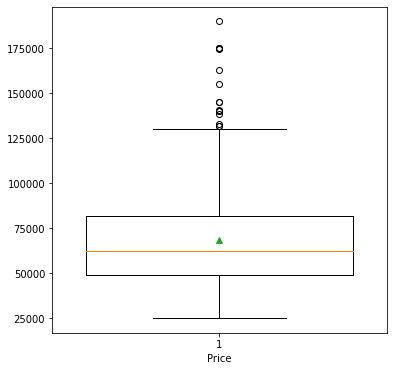

In [ ]:
#Visualize the price varible using box plot

fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(df['price'], widths=0.8, showmeans=True)
ax.set_xlabel('Price')
plt.show()

In [ ]:
# dealing with outliers
Q1 = np.percentile(df['price'], 25)
Q2 = np.percentile(df['price'], 50)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

**There are few binary variables which could have a relationship with target variable, instead of dropping them i would like to encode and use it for our problem**

In [ ]:
#Importing libraries for encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#Features which have binary variables
df["driveway"] = encoder.fit_transform(df["driveway"])
df["recroom"] = encoder.fit_transform(df["recroom"])
df["fullbase"] = encoder.fit_transform(df["fullbase"])
df["gashw"] = encoder.fit_transform(df["gashw"])
df["airco"] = encoder.fit_transform(df["airco"])
df["prefarea"] = encoder.fit_transform(df["prefarea"])


**Here i would like to feature normalization to improve convergence of the model and to bring all the values of the independent variables to similar scale**

In [ ]:
# Feature Normalization
mean_vals = np.mean(df, axis=0)
std_vals = np.std(df, axis=0)
df_scaled = (df - mean_vals) / std_vals

In [ ]:
#Final dataframe
df_scaled.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,-1.043248,0.380682,0.077484,-0.560559,0.242739,0.411829,-0.460791,1.373270,-0.212781,-0.665533,0.400250,-0.534522
1,-1.196962,-0.512374,-1.293991,-0.560559,-0.918472,0.411829,-0.460791,-0.728189,-0.212781,-0.665533,-0.787084,-0.534522
2,-0.713863,-0.966143,0.077484,-0.560559,-0.918472,0.411829,-0.460791,-0.728189,-0.212781,-0.665533,-0.787084,-0.534522
3,-0.230764,0.766868,0.077484,-0.560559,0.242739,0.411829,2.170179,-0.728189,-0.212781,-0.665533,-0.787084,-0.534522
4,-0.208805,0.626875,-1.293991,-0.560559,-0.918472,0.411829,-0.460791,-0.728189,-0.212781,-0.665533,-0.787084,-0.534522


**Lets divide the dataframe into two parts, independent and dependent variables.**

**Here the target or dependent variable is y and our independent variable X**

In [ ]:
#Creating independent and dependent variables
X = df_scaled[['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl','driveway',	'recroom',	'fullbase',	'gashw',	'airco','prefarea']]
y = df_scaled['price'].values

In [ ]:
X_scaled = X.values
X_scaled

array([[ 0.38068171,  0.07748447, -0.56055893, ..., -0.21278062,
        -0.66553346, -0.53452248],
       [-0.51237415, -1.29399058, -0.56055893, ..., -0.21278062,
        -0.66553346, -0.53452248],
       [-0.96614308,  0.07748447, -0.56055893, ..., -0.21278062,
        -0.66553346, -0.53452248],
       ...,
       [ 0.45309165,  0.07748447,  1.59637434, ..., -0.21278062,
         1.50255406, -0.53452248],
       [ 0.45309165,  0.07748447,  1.59637434, ..., -0.21278062,
         1.50255406, -0.53452248],
       [ 0.45309165,  0.07748447, -0.56055893, ..., -0.21278062,
         1.50255406, -0.53452248]])

**While Performing the linear regression we need to declare few things like  learning rate, Number of iterations to run gradient descent algorithm and Initial weights**

**Splitting the dataset using 80/20 rule for training and testing**

In [ ]:
def loss_function(X, y, weights):
  #For initial step we are creating an  empty array to store prediction
    predictions = []
    for i in range(len(X)):
        prediction = 0
        for j in range(X.shape[1]):
            prediction += X[i, j] * weights[j]
        predictions.append(prediction)
    errors = predictions - y
    #squaring the error to get mean square error
    loss = np.mean(errors ** 2)
    return loss


In [ ]:
def gradient_descent(X, y, weights, learning_rate,number_iterations, tol=1e-6):
    loss_history = []
    for i in range(number_iterations):
        predictions = []
        for j in range(len(y)):
            prediction = 0
            for k in range(len(weights)):
                prediction += weights[k] * X[j][k]
            predictions.append(prediction)
        error = [predictions[j] - y[j] for j in range(len(y))]
        gradient = []
        for k in range(len(weights)):
            gradient_k = 0
            for j in range(len(y)):
                gradient_k += error[j] * X[j][k]
            gradient_k /= len(y)
            gradient.append(gradient_k)
        weights_new = [weights[k] - learning_rate * gradient[k] for k in range(len(weights))]
        loss = loss_function(X, y, weights_new)
        loss_history.append(loss)
        if i % 50 == 0:
            print(f"{i}th iteration: {loss}")
        if i > 0 and np.allclose(weights, weights_new, rtol=tol, atol=tol):
            print(f"Our Model Converged at {i} iterations")
            break
        weights = weights_new
    return weights, loss_history


In [ ]:
# Setting the learning rate and number of iterations
learning_rate = 0.1
number_iterations = 500
weights = np.zeros(X.shape[1])
weights, loss_history = gradient_descent(X_scaled, y, weights, learning_rate, number_iterations)

0th iteration: 0.7510365471587084
50th iteration: 0.34498291577165774
100th iteration: 0.3448736101610851
150th iteration: 0.344872298913909
Our Model Converged at 185 iterations


**The model converged at 185th iteration and will be taking weights at that particular iteration, since its an optimum weights**

In [ ]:
print("Best weights: ", weights)
print("Final loss: ", loss_history[-1])

# Compute the RMSE
y_pred = []
for j in range(len(y)):
  pred=0
  for k in range(len(weights)):
    pred+= weights[k] * X_scaled[j][k]
  y_pred.append(pred)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print("RMSE: ", rmse)

Best weights:  [0.28911458346784485, 0.04072417334178763, 0.23151919474992036, 0.2543746293500494, 0.11674847538135613, 0.11000278112291956, 0.08984024404413767, 0.11385139074577133, 0.0997767615499017, 0.2427329993028021, 0.12712553474024277]
Final loss:  0.3448722818249763
RMSE:  0.5872582752969897


In [ ]:
line = np.dot(X_scaled, weights)
len(line)

531

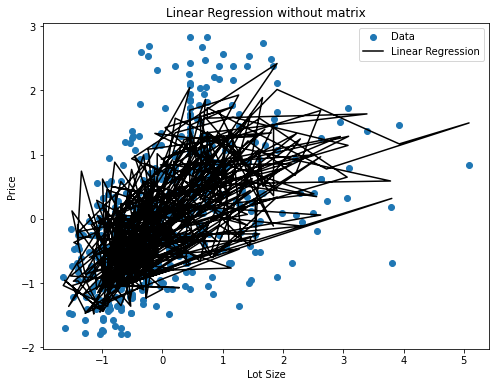

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_scaled[:,0], y, label='Data')
ax.plot(X_scaled[:,0], line, color='black', label='Linear Regression')
ax.set_xlabel('Lot Size')
ax.set_ylabel('Price')
ax.set_title('Linear Regression without matrix')
ax.legend()
plt.show()


##1.2 Linear regression using gradient descent method with matrix calculation

In [ ]:
# Define the cost function
def loss_function(X, y, weights):
    predictions = X.dot(weights)
    errors = predictions - y
    loss = np.mean(errors**2)
    return loss


In [ ]:
def gradient_descent(X, y, weights,learning_rate ,number_iterations, tol=1e-6):
  loss_history = []
  for i in range(number_iterations):
    predictions = X.dot(weights)
    errors = predictions - y
    gradient = X.T.dot(errors) / len(y)
    weights_new = weights - learning_rate * gradient
    cost = loss_function(X, y, weights_new)
    loss_history.append(cost)
    if i % 50 == 0:
      print(f"{i}th iteration: {cost}")
    if i > 0 and np.allclose(weights, weights_new, rtol=tol, atol=tol):
      print(f"Converged after {i} iterations")
      break
    weights = weights_new
  return weights, loss_history

In [ ]:
learning_rate = 0.1
number_iterations = 500
weights = np.zeros(X.shape[1])

weights, loss_history = gradient_descent(X_scaled, y, weights, learning_rate, number_iterations)

0th iteration: 0.7510365471587084
50th iteration: 0.3449829157716578
100th iteration: 0.3448736101610851
150th iteration: 0.344872298913909
Converged after 185 iterations


In [ ]:
print("Best weights: ", weights)
print("Final loss: ", loss_history[-1])

# Compute the RMSE
y_pred = []
for j in range(len(y)):
  pred=0
  for k in range(len(weights)):
    pred+= weights[k] * X_scaled[j][k]
  y_pred.append(pred)
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print("RMSE: ", rmse)

Best weights:  [0.28911458 0.04072417 0.23151919 0.25437463 0.11674848 0.11000278
 0.08984024 0.11385139 0.09977676 0.242733   0.12712553]
Final loss:  0.3448722818249763
RMSE:  0.5872582752969897


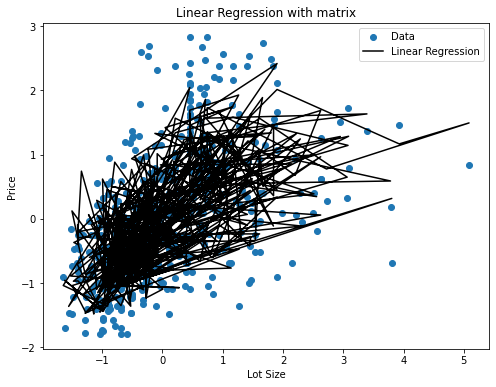

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_scaled[:,0], y, label='Data')
ax.plot(X_scaled[:,0], np.dot(X_scaled, weights), color='black', label='Linear Regression')
ax.set_xlabel('Lot Size')
ax.set_ylabel('Price')
ax.set_title('Linear Regression with matrix')
ax.legend()
plt.show()


## 1-3 Linear regression using Normal equation
Find the optimum Weights using Normal equation.
Please print out the weight values and the Root Mean Squared Error (RMSE). Please fit the data using the Linear
regression model with the Weight (Please plot ‘price’ vs ‘lotsize’).

In [ ]:
X = df_scaled[['lotsize','bedrooms', 'bathrms', 'stories','garagepl']].values

X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Calculate the optimal weights using the normal equation
weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

predictions = X.dot(weights)
rmse = np.sqrt(np.mean((predictions - y)**2))
print(f'RMSE on training set: {rmse}')

RMSE on training set: 0.690469878877147


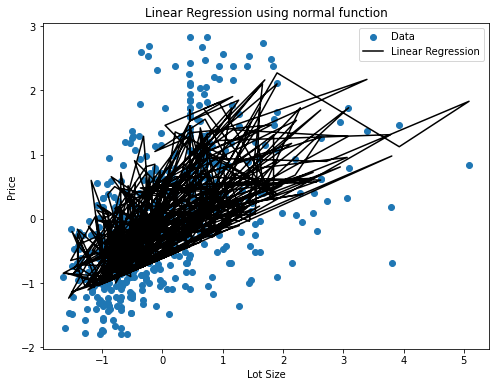

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,1], y, label='Data')
ax.plot(X[:,1], np.dot(X, weights), color='black', label='Linear Regression')
ax.set_xlabel('Lot Size')
ax.set_ylabel('Price')
ax.set_title('Linear Regression using normal function')
ax.legend()
plt.show()

## 1-4. Linear regression using scikit-learn linear regression model
Find the optimum Weights using linear regression algorithm from scikit-learn library. Please print out the weight values
and the Root Mean Squared Error (RMSE). Please fit the data using the Linear regression model with the Weight (Please
plot ‘price’ vs ‘lotsize’).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print(f'RMSE on training set: {rmse}')

RMSE on training set: 0.6573432391767191


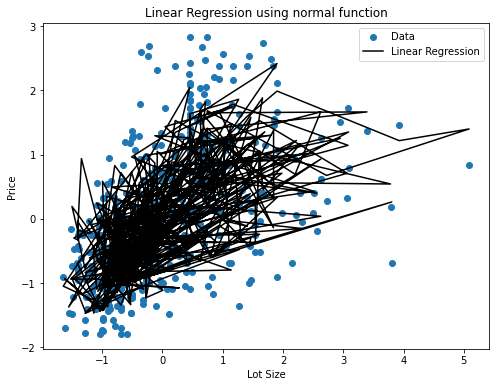

In [ ]:
weights = lr.coef_

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_scaled[:,0], y, label='Data')
ax.plot(X_scaled[:,0], np.dot(X_scaled, weights), color='black', label='Linear Regression')
ax.set_xlabel('Lot Size')
ax.set_ylabel('Price')
ax.set_title('Linear Regression using normal function')
ax.legend()
plt.show()

# 2.We are using the housing.xlsx file. You need to split the above data into training/validation/testing data set with the ratio
of 60% / 20% / 20% to check overfitting.
Please use np.random.seed (41) for splitting to have consistent data for evaluation.
Our target variable is ‘price’. To simply the problem, please consider ‘lotsize’ as only the input variable.

## 2-1. Fit the training data using 16th order polynomial regression model and Ridge (L2 penalty) regularization.
Note: Please do not use any open-source algorithm. Instead, please use gradient descent method from scratch. You can
choose without matrix calculation or with matrix calculation.
You need to try at least 5 different L2 penalty (for example, λ = 0.1, 0.3, 0.7, 1, 3, 7, 10, etc.).
Search optimum L2 penalty based on Root Mean Squared Error (RMSE) of validation data.
Plot weight coefficients with the different L2 penalty values(λ).
Please fit the train/valid/test data using the Linear regression model with and without the optimum L2 regularization
(Please plot ‘price’ vs ‘lotsize’).
Print out the optimized weight values based on the optimum L2 penalty value(λ).
Print out Root Mean Squared Error (RMSE) for training/validation/test data based on the optimum L2 penalty value (λ).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error




In [ ]:
# Read the dataset
df = pd.read_excel('/content/drive/MyDrive/Data_Mining /Assignment_2/housing (1).xlsx')
X = df['lotsize'].values.reshape(-1, 1)
y = df['price'].values



In [ ]:
# Split the data
np.random.seed(41)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def transform_features(X_train, X_val, X_test, degree=16):
    poly = PolynomialFeatures(degree=16)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    return X_train_poly, X_val_poly, X_test_poly, poly

In [ ]:
# Transform the input features into a 16th order polynomial
X_train_poly, X_val_poly, X_test_poly, poly = transform_features(X_train, X_val, X_test)



In [ ]:
# Initialize hyperparameters
l2 = [0.1, 0.3, 0.7, 1, 3, 7, 10]
learning_rate = 1e-6
number_iterations = 500
tol = 1e-6
optimized_lambda = None
best_val_rmse = float('inf')

# Define the loss function with L2 penalty
def loss_function_with_l2(X, y, weights, l2_value):
    loss = loss_function(X, y, weights)
    l2_penalty = l2_value * np.sum(np.square(weights))
    return loss + l2_penalty

# Modify the gradient descent function to include L2 penalty
def gradient_descent_with_l2(X, y, weights, learning_rate, number_iterations, l2_value, tol=1e-6):
    loss_history = []
    for i in range(number_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = 2 * X.T.dot(errors) / len(y) + 2 * l2_value * weights
        weights_new = weights - learning_rate * gradient
        loss = loss_function_with_l2(X, y, weights_new, l2_value)
        loss_history.append(loss)
        if i % 50 == 0:
            print(f"{i}th iteration: {loss}")
        if i > 0 and np.allclose(weights, weights_new, rtol=tol, atol=tol):
            print(f"Our Model Converged at {i} iterations")
            break
        weights = weights_new
    return weights, loss_history

# for l2_value in l2:
#     ridge = Ridge(learning_rate=l2_value)
#     ridge.fit(X_train_poly, y_train)
#     y_val_pred = ridge.predict(X_val_poly)
#     val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
#     print(f"L2: {l2_value:.1f} | Validation RMSE: {val_rmse:.2f}")

#     if val_rmse < best_val_rmse:
#         optimized_l2 = l2_value
#         best_val_rmse = val_rmse

# print(f"\optimized l2: {optimized_l2:.1f}")
# ridge = Ridge(learning_rate = optimized_l2)
# ridge.fit(X_train_poly, y_train)
initial_weights = np.random.randn(X_train_poly.shape[1])
for lambda_val in l2:
    weights, loss_history = gradient_descent_with_l2(X_train_poly, y_train, initial_weights, learning_rate, number_iterations, lambda_val, tol)
    y_val_pred = X_val_poly.dot(weights)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"Lambda: {lambda_val:.1f} | Validation RMSE: {val_rmse:.2f}")

    if val_rmse < best_val_rmse:
        best_lambda = lambda_val
        best_val_rmse = val_rmse

print(f"\nBest lambda: {best_lambda:.1f}")

# Train the model with the best lambda value
best_weights, _ = gradient_descent_with_l2(X_train_poly, y_train, initial_weights, learning_rate, number_iterations, best_lambda, tol)

# Compute the RMSE for training/validation/test data
y_train_pred = X_train_poly.dot(best_weights)
y_val_pred = X_val_poly.dot(best_weights)
y_test_pred = X_test_poly.dot(best_weights)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE for training data: {train_rmse:.2f}")
print(f"RMSE for validation data: {val_rmse:.2f}")
print(f"RMSE for test data: {test_rmse:.2f}")

0th iteration: inf
50th iteration: nan
100th iteration: nan
150th iteration: nan
200th iteration: nan
250th iteration: nan
300th iteration: nan
350th iteration: nan
400th iteration: nan
450th iteration: nan


<ipython-input-23-b4d313b8cac6>:5: RuntimeWarning: overflow encountered in square
  loss = np.mean(errors**2)
<ipython-input-59-baf0301600e3>:12: RuntimeWarning: overflow encountered in square
  l2_penalty = l2_value * np.sum(np.square(weights))
<ipython-input-59-baf0301600e3>:22: RuntimeWarning: invalid value encountered in subtract
  weights_new = weights - learning_rate * gradient


ValueError: ignored

Lambda: 0.1 | Validation RMSE: 20501772597845362540826499567129311539954733547520.00
Lambda: 0.3 | Validation RMSE: 20501772393635245165486225510152125050665379561472.00
Lambda: 0.7 | Validation RMSE: 20501771985204859474447241808183974951763046301696.00
Lambda: 1.0 | Validation RMSE: 20501771678884070538532754574051753751297128398848.00
Lambda: 3.0 | Validation RMSE: 20501769636759367891915563432881202914287727673344.00
Lambda: 7.0 | Validation RMSE: 20501765552534444278369172862808622530461198974976.00
Lambda: 10.0 | Validation RMSE: 20501762489378597310637395098807171690509792968704.00
Best lambda: 10.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.5857e-42): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.37571e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.20999e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.5857e-41): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-

ValueError: ignored

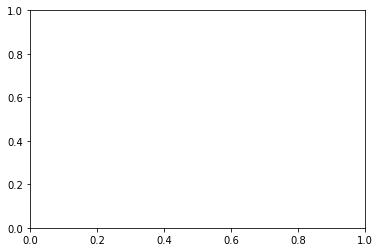

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize hyperparameters
l2 = [0.1, 0.3, 0.7, 1, 3, 7, 10]
best_lambda = None
best_val_rmse = float('inf')

# Compute the best lambda value
for lambda_val in l2:
    ridge = Ridge(alpha=lambda_val)
    ridge.fit(X_train_poly, y_train)
    y_val_pred = ridge.predict(X_val_poly)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"Lambda: {lambda_val:.1f} | Validation RMSE: {val_rmse:.2f}")

    if val_rmse < best_val_rmse:
        best_lambda = lambda_val
        best_val_rmse = val_rmse

print(f"Best lambda: {best_lambda:.1f}")

# Train the model with the best lambda value
ridge = Ridge(alpha=best_lambda)
ridge.fit(X_train_poly, y_train)

# Plot the coefficients
import matplotlib.pyplot as plt
%matplotlib inline

coefficients = []
for lambda_val in l2:
    ridge = Ridge(alpha=lambda_val)
    ridge.fit(X_train_poly, y_train)
    coefficients.append(ridge.coef_)

# Transpose the coefficients matrix to have lambdas as columns and features as rows
coefficients = np.array(coefficients).T

for i, coef in enumerate(coefficients):
    plt.plot(l2, coef, label=f'Feature {i}')





In [ ]:
from sklearn.linear_model import Ridge
# Initialize hyperparameters
l2 = [0.1, 0.3, 0.7, 1, 3, 7, 10]
alpha = 1e-6
number_iterations = 500
tol = 1e-6
optimized_lambda = None
best_val_rmse = float('inf')

# Define the loss function with L2 penalty
def loss_function_with_l2(X, y, weights, l2_value):
    loss = loss_function(X, y, weights)
    l2_penalty = l2_value * np.sum(np.square(weights))
    return loss + l2_penalty

# Modify the gradient descent function to include L2 penalty
def gradient_descent_with_l2(X, y, weights, learning_rate, number_iterations, l2_value, tol=1e-6):
    loss_history = []
    for i in range(number_iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        gradient = 2 * X.T.dot(errors) / len(y) + 2 * l2_value * weights
        weights_new = weights - learning_rate * gradient
        loss = loss_function_with_l2(X, y, weights_new, l2_value)
        loss_history.append(loss)
        if i % 50 == 0:
            print(f"{i}th iteration: {loss}")
        if i > 0 and np.allclose(weights, weights_new, rtol=tol, atol=tol):
            print(f"Our Model Converged at {i} iterations")
            break
        weights = weights_new
    return weights, loss_history

for l2_value in l2:
    ridge = Ridge(alpha = l2_value)
    ridge.fit(X_train_poly, y_train)
    y_val_pred = ridge.predict(X_val_poly)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"L2: {l2_value:.1f} | Validation RMSE: {val_rmse:.2f}")

    if val_rmse < best_val_rmse:
        optimized_l2 = l2_value
        best_val_rmse = val_rmse

print(f"\optimized l2: {optimized_l2:.1f}")
ridge = Ridge(alpha = optimized_l2)
ridge.fit(X_train_poly, y_train)

rmse_val = []
for l in l2:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train_poly, y_train)
    X_val_poly = poly.transform(X_val)
    y_val_pred = ridge.predict(X_val_poly)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_val.append(rmse)

l2_opt = l2[np.argmin(rmse_val)]
X_train_poly = poly.fit_transform(X_train)
ridge = Ridge(alpha=l2_opt)
ridge.fit(X_train_poly, y_train)
print("weights: ", ridge.coef_)
weights = []
for l2_value in l2:
    ridge = Ridge(alpha=l2_value)
    ridge.fit(X_train_poly, y_train)
    weights.append(ridge.coef_[0])



L2: 0.1 | Validation RMSE: 43415510.86
L2: 0.3 | Validation RMSE: 43415510.86
L2: 0.7 | Validation RMSE: 43415510.86
L2: 1.0 | Validation RMSE: 43415510.86
L2: 3.0 | Validation RMSE: 43415510.86
L2: 7.0 | Validation RMSE: 43415510.86
L2: 10.0 | Validation RMSE: 43415510.86
\optimized l2: 0.1
weights:  [ 0.00000000e+00 -2.01436505e-44  8.28320894e-39 -2.57523815e-33
  1.52810142e-29 -2.48516453e-28  1.60733001e-23 -1.84274152e-22
  3.44085959e-22 -1.85667900e-25  4.15408935e-29 -5.04131743e-33
  3.71628371e-37 -1.85077423e-41  7.11415610e-46 -2.08098035e-50
  3.12844989e-55]


2.2

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(41)
X = df[['lotsize']].values
y = df['price'].values.reshape(-1, 1)
n = len(X)
n_train = int(0.6 * n)
n_valid = int(0.2 * n)

# Shuffling
idx = np.arange(n)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# split the data
X_train, y_train = X[:n_train], y[:n_train]
X_valid, y_valid = X[n_train:n_train+n_valid], y[n_train:n_train+n_valid]
X_test, y_test = X[n_train+n_valid:], y[n_train+n_valid:]

In [ ]:
def lasso_reg(weights, l2):
    return lam * np.abs(weights)

def lasso_reg_grad(weights, l2):
    return lam * np.sign(weights)

def polynomial_features(X, degree):
    n = X.shape[0]
    features = np.ones((n, 1))
    for i in range(1, degree+1):
        feature = X ** i
        features = np.concatenate((features, feature), axis=1)
    return features

def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

def gradient_descent(X, y, alpha, l2, max_iter, degree):
    n, m = X.shape
    w = np.random.randn(m, 1)
    X_poly = polynomial_features(X, degree)
    for i in range(max_iter):
        y_pred = X_poly @ w
        error = y_pred - y
        if i % 100 == 0:
            print(f'Iteration {i}, RMSE: {rmse(y_pred, y)}')
        w -= alpha * (X_poly.T @ error + lasso_reg_grad(w, lam))
    return w

In [ ]:
max_iter = 1000
alpha = 0.1
degrees = [16]
l2 = [0.01, 0.1, 1, 10, 100]
best_rmse = float('inf')
best_w = None
optimized_l2 = None
results = []
for degree in degrees:
    X_train_poly = polynomial_features(X_train, degree)
    X_valid_poly = polynomial_features(X_valid, degree)
    for lam in lams:
        print(f"Degree: {degree}, Lambda: {l2}")
        #w = gradient_descent(X_train, y_train, alpha, lam, max_iter, degree)
        y_pred_valid = X_valid_poly

Degree: 16, Lambda: 0.01
Degree: 16, Lambda: 0.1
Degree: 16, Lambda: 1
Degree: 16, Lambda: 10
Degree: 16, Lambda: 100
